<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#判定贷款用户是否逾期" data-toc-modified-id="判定贷款用户是否逾期-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>判定贷款用户是否逾期</a></span><ul class="toc-item"><li><span><a href="#数据集预览" data-toc-modified-id="数据集预览-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>数据集预览</a></span></li><li><span><a href="#数据预处理" data-toc-modified-id="数据预处理-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>数据预处理</a></span><ul class="toc-item"><li><span><a href="#删除无用特征" data-toc-modified-id="删除无用特征-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>删除无用特征</a></span></li><li><span><a href="#字符型特征-编码" data-toc-modified-id="字符型特征-编码-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>字符型特征-编码</a></span></li><li><span><a href="#缺失值处理" data-toc-modified-id="缺失值处理-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>缺失值处理</a></span></li></ul></li><li><span><a href="#特征工程" data-toc-modified-id="特征工程-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>特征工程</a></span></li><li><span><a href="#模型选择" data-toc-modified-id="模型选择-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>模型选择</a></span><ul class="toc-item"><li><span><a href="#数据集划分" data-toc-modified-id="数据集划分-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>数据集划分</a></span></li><li><span><a href="#LR模型" data-toc-modified-id="LR模型-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>LR模型</a></span></li><li><span><a href="#SVM模型" data-toc-modified-id="SVM模型-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>SVM模型</a></span></li><li><span><a href="#决策树模型" data-toc-modified-id="决策树模型-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>决策树模型</a></span></li><li><span><a href="#XGBoost模型" data-toc-modified-id="XGBoost模型-1.4.5"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>XGBoost模型</a></span></li><li><span><a href="#LightGBM模型" data-toc-modified-id="LightGBM模型-1.4.6"><span class="toc-item-num">1.4.6&nbsp;&nbsp;</span>LightGBM模型</a></span></li></ul></li><li><span><a href="#模型调参" data-toc-modified-id="模型调参-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>模型调参</a></span></li><li><span><a href="#模型评估" data-toc-modified-id="模型评估-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>模型评估</a></span></li></ul></li><li><span><a href="#遇到的问题" data-toc-modified-id="遇到的问题-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>遇到的问题</a></span></li><li><span><a href="#Reference" data-toc-modified-id="Reference-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reference</a></span></li></ul></div>

# 判定贷款用户是否逾期

给定金融数据，预测贷款用户是否会逾期。
（status是标签：0表示未逾期，1表示逾期。）

**Task1** - 构建逻辑回归模型进行预测（在构建部分数据需要进行缺失值处理和数据类型转换，如果不能处理，可以直接暴力删除）

**Task2** - 构建SVM和决策树模型进行预测

**Task3** - 构建xgboost和lightgbm模型进行预测

**Task4（模型评估）** - 记录五个模型关于accuracy、precision和recall、f1-score、auc的评分表格，画出roc曲线

**Task5（数据探索）** - 数据类型转换以及缺失值处理（尝试不同的填充看效果）以及你能借鉴的数据探索

## 数据集预览

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(4754, 90)


,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,...,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,...,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,...,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,...,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,...,2300.0,1630.0,8300.0,79.0,2.0,2.0,8400.0,8250.0,22.0,120.0


In [2]:
# 观察各列的属性名称
data.columns

Index(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no',
       'low_volume_percent', 'middle_volume_percent',
       'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'trans_activity_month',
       'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter',
       'trans_days_interval', 'regional_mobility', 'student_feature',
       'repayment_capability', 'is_high_user', 'number_of_trans_from_2011',
       'first_transaction_time', 'historical_trans_amount',
       'historical_trans_day', 'rank_trad_1_month', 'trans_amount_3_month',
       'avg_consume_less_12_valid_month', 'abs',
       'top_trans_count_last_1_month', 'avg_price_last_12_month',
       'avg_price_top_last_12_valid_month', 'reg_preference_for_trad',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'cross_consume_count_last_1_month',
       'trans_fail_top_count_enum_last_1_mont

## 数据预处理

> 无用特征删除、字符型特征编码和缺失值填充。

###  删除无用特征

'bank_card_no','source'的取值**无区分度**

'Unnamed: 0', 'custid', 'trade_no'和id_name'**与预测无关**

In [3]:
data.drop(['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no', 'source', 'id_name'], 
          axis=1, inplace=True)
print(data.shape)

(4754, 84)


**日期特征**（暂时删除, 以后再处理。）

In [4]:
data.drop(['first_transaction_time', 'latest_query_time', 'loans_latest_time'], 
          axis=1, inplace=True)

### 字符型特征-编码

In [5]:
data['reg_preference_for_trad'].value_counts()

一线城市    3403
三线城市    1064
境外       150
二线城市     131
其他城市       4
Name: reg_preference_for_trad, dtype: int64

In [6]:
dic = {}
for i, val in enumerate(list(data['reg_preference_for_trad'].unique())):
    dic[val] = i

In [7]:
data['reg_preference_for_trad'] = data['reg_preference_for_trad'].map(dic)

### 缺失值处理

In [8]:
for feature in data.columns:
    summ = data[feature].isnull().sum()
    if summ:
        print('%.4f'%(summ*100/4754), '%',  '--', feature)

0.0421 % -- low_volume_percent
0.0421 % -- middle_volume_percent
0.0631 % -- trans_amount_increase_rate_lately
0.0421 % -- trans_activity_month
0.0421 % -- trans_activity_day
0.0421 % -- transd_mcc
0.1683 % -- trans_days_interval_filter
0.0421 % -- trans_days_interval
0.0421 % -- regional_mobility
63.0627 % -- student_feature
0.0421 % -- number_of_trans_from_2011
0.0421 % -- historical_trans_day
0.0421 % -- rank_trad_1_month
0.0421 % -- avg_consume_less_12_valid_month
0.0421 % -- top_trans_count_last_1_month
2.1876 % -- avg_price_top_last_12_valid_month
0.1683 % -- trans_top_time_last_1_month
0.1683 % -- trans_top_time_last_6_month
0.1683 % -- consume_top_time_last_1_month
0.1683 % -- consume_top_time_last_6_month
8.9609 % -- cross_consume_count_last_1_month
0.3366 % -- trans_fail_top_count_enum_last_1_month
0.3366 % -- trans_fail_top_count_enum_last_6_month
0.3366 % -- trans_fail_top_count_enum_last_12_month
0.5469 % -- consume_mini_time_last_1_month
0.1683 % -- max_consume_count_late

1) student_feature 缺失占比多, 需要用**众数**填充;

In [9]:
data['student_feature'].value_counts()

1.0    1754
2.0       2
Name: student_feature, dtype: int64

In [10]:
data['student_feature'].fillna(1.0, inplace = True)

In [11]:
data['student_feature'].value_counts()

1.0    4752
2.0       2
Name: student_feature, dtype: int64

2) 其余特征用**均值**填充。

In [12]:
for feature in data.columns:
    summ = data[feature].isnull().sum()
    if summ:
        data[feature].fillna(data[feature].mean(), inplace = True)

'Unnamed: 0', 'custid', 'trade_no', 'bank_card_no', 'source'都没用, 'id_name'表示姓名, 没用？

'take_amount_in_later_12_month_highest'数值跨度可能较大, 归一化？

某些特征可能包含缺失值NAN

'reg_preference_for_trad'需要编码

'latest_query_time', 'loans_latest_time'为日期特征

## 特征工程

## 模型选择

### 数据集划分

In [13]:
features = [x for x in data.columns if x not in ['status']]

In [14]:
import warnings
warnings.filterwarnings("ignore")
# 划分训练集测试集
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[features]
y = data.status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2333)

# 特征归一化
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

### LR模型

In [18]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### SVM模型

> 线性核函数、多项式核函数、高斯核函数、sigmoid核函数

In [19]:
from sklearn import svm

svm_linear = svm.SVC(kernel = 'linear', probability=True).fit(X_train, y_train)
svm_poly = svm.SVC(kernel = 'poly', probability=True).fit(X_train, y_train)
svm_rbf = svm.SVC(probability=True).fit(X_train, y_train)
svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(X_train, y_train)

### 决策树模型

> 树模型，特征不需归一化。

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### XGBoost模型

In [21]:
import warnings
warnings.filterwarnings("ignore")
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### LightGBM模型

In [22]:
from lightgbm.sklearn import LGBMClassifier

lgb= LGBMClassifier()
lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## 模型调参

In [ ]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
lr_param = {'penalty': ('l1', 'l2'), 'C': [0.0001,0.001,0.01,0.1,1,10,100,1000]}

grid = GridSearchCV(lr, param_grid = lr_param, cv = 5)
grid.fit(X_train, y_train)

print(grid.best_params_, grid.best_score_)

## 模型评估

> 观察accuracy、precision，recall和f1-score、auc的取值，并画出roc曲线图

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率
    print('[精准率]', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率
    print('[召回率]', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('[f1-score]', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # auc取值：用roc_auc_score或auc
    print('[auc值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # roc曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC curve")

[准确率] 训练集： 0.7995 测试集： 0.8024
[精准率] 训练集： 0.7094 测试集： 0.7052
[召回率] 训练集： 0.3488 测试集： 0.3456
[f1-score] 训练集： 0.4677 测试集： 0.4639
[auc值] 训练集： 0.8054 测试集： 0.8050


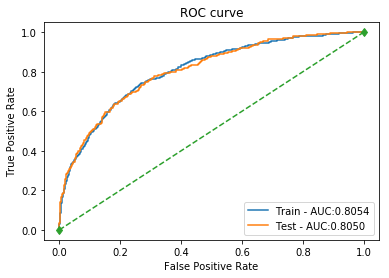

In [25]:
# 逻辑回归
model_metrics(lr, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7908 测试集： 0.7954
[精准率] 训练集： 0.7647 测试集： 0.7905
[召回率] 训练集： 0.2476 测试集： 0.2351
[f1-score] 训练集： 0.3741 测试集： 0.3624
[auc值] 训练集： 0.8042 测试集： 0.8094


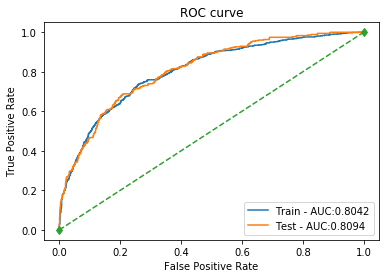

In [26]:
# 线性SVM
model_metrics(svm_linear, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8284 测试集： 0.7554
[精准率] 训练集： 0.9786 测试集： 0.5208
[召回率] 训练集： 0.3274 测试集： 0.1416
[f1-score] 训练集： 0.4906 测试集： 0.2227
[auc值] 训练集： 0.9391 测试集： 0.7117


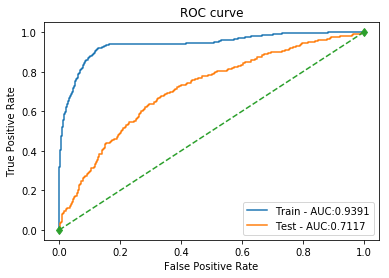

In [24]:
# 多项式SVM
model_metrics(svm_poly, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8266 测试集： 0.7975
[精准率] 训练集： 0.9046 测试集： 0.7963
[召回率] 训练集： 0.3500 测试集： 0.2436
[f1-score] 训练集： 0.5047 测试集： 0.3731
[auc值] 训练集： 0.9170 测试集： 0.7680


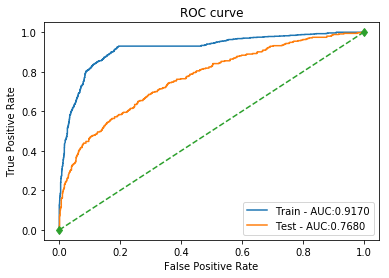

In [25]:
# 高斯核SVM
model_metrics(svm_rbf, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7205 测试集： 0.7379
[精准率] 训练集： 0.4373 测试集： 0.4662
[召回率] 训练集： 0.3738 测试集： 0.4108
[f1-score] 训练集： 0.4031 测试集： 0.4367
[auc值] 训练集： 0.6600 测试集： 0.6784


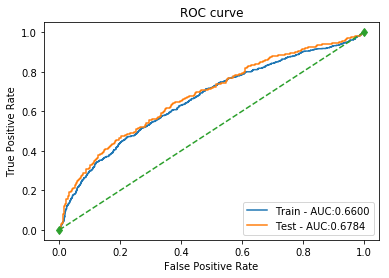

In [26]:
# sigmoid-SVM
model_metrics(svm_sigmoid, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7920 测试集： 0.7737
[精准率] 训练集： 0.6581 测试集： 0.5862
[召回率] 训练集： 0.3667 测试集： 0.2890
[f1-score] 训练集： 0.4709 测试集： 0.3871
[auc值] 训练集： 0.7727 测试集： 0.7468


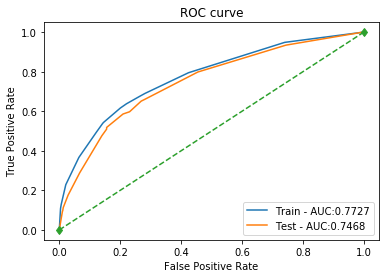

In [27]:
# 决策树
model_metrics(dt, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8521 测试集： 0.8045
[精准率] 训练集： 0.8718 测试集： 0.7079
[召回率] 训练集： 0.4857 测试集： 0.3569
[f1-score] 训练集： 0.6239 测试集： 0.4746
[auc值] 训练集： 0.9166 测试集： 0.7972


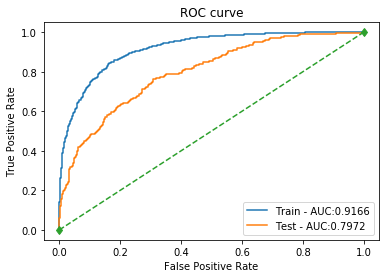

In [28]:
# XGBoost
model_metrics(xgb, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.9949 测试集： 0.7961
[精准率] 训练集： 1.0000 测试集： 0.6550
[召回率] 训练集： 0.9798 测试集： 0.3711
[f1-score] 训练集： 0.9898 测试集： 0.4738
[auc值] 训练集： 1.0000 测试集： 0.7869


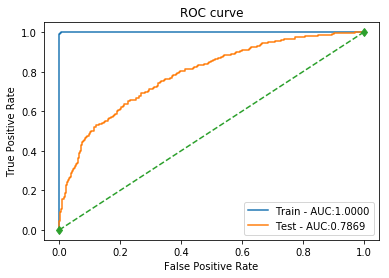

In [29]:
# lightGBM
model_metrics(lgb, X_train, X_test, y_train, y_test)

# 遇到的问题

1）pd.read_csv读取文件时，utf-8的编码问题。

解决方法：reference1

2）装完xgboost后在notebook总是显示如下错误：ImportError: cannot import name 'MultiIndex'。

**解决方法**：更新scipy和xgboost后还是没有解决；后来重启了一下jupyter就好了....

3）画ROC曲线时, tpr取值为nan

**解决方法**：注意roc_curve里的几个参数：第二项为**真实y与预测的scores**而不是y_pred，而pos_label=1指在y中标签为1的是标准阳性标签，其余值是阴性。

4）svm用函数clf.predict_proba()时候报错如下：

> AttributeError: predict_proba is not available when  probability=False
 
**解决方法**：clf = SVC()默认情况probability=False，添加probability=True

# Reference

1) [python问题--UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte](https://blog.csdn.net/u012429555/article/details/80960985)

2) [xgboost的原生版本与sklearn 接口版本对比](https://blog.csdn.net/PIPIXIU/article/details/80463565)